In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, classification_report

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek,SMOTEENN

In [ ]:
train_0 = pd.read_csv('/content/TrainCluster_0_dataframe.csv')
test_0 = pd.read_csv('/content/TestCluster_0_dataframe.csv')

train_1 = pd.read_csv('/content/TrainCluster_1_dataframe.csv')
test_1 = pd.read_csv('/content/TestCluster_1_dataframe.csv')

In [ ]:
train_0.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,cluster,target
0,-0.894626,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,2.0,1.0,1.0,1.0,3.0,0,0
1,-0.513599,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,4.0,0.0,5.0,0.0,2.0,0,0
2,-0.273230,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,1.0,1.0,0.0,3.0,0,0
3,-0.432337,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,3.0,6.0,0.0,0.0,0.0,0,1
4,1.536254,5.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,3.0,6.0,0.0,0.0,0.0,0,0


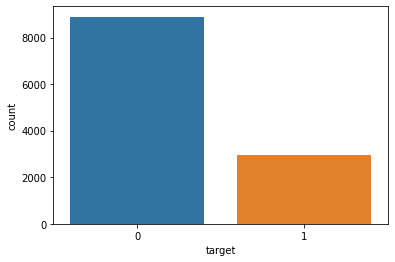

In [ ]:
sns.countplot(train_0['target'])

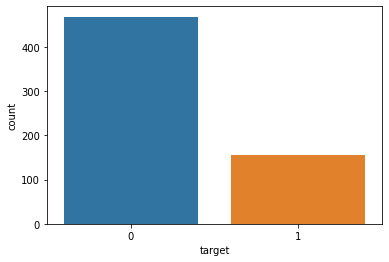

In [ ]:
sns.countplot(test_0['target'])

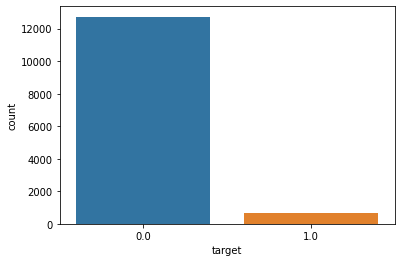

In [ ]:
sns.countplot(train_1['target'])

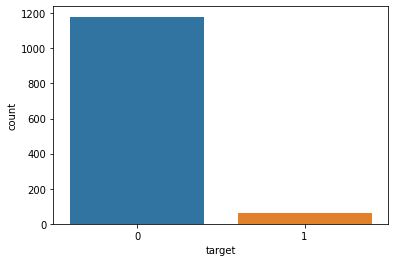

In [ ]:
sns.countplot(test_1['target'])

Cluster_1 SMOTE

In [ ]:
x_cluster_1 = train_1.drop(['cluster',	'target'], axis='columns')
y_cluster_1 = train_1['target']

x_test_1 =  test_1.drop(['cluster',	'target'], axis='columns')
y_test_1 = test_1['target']

In [ ]:
x_cluster_1.shape

(23602, 34)

In [ ]:
x_cluster_1.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.895649,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,4.0,2.0,2.0,6.0,6.0
1,0.599077,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,6.0,4.0,4.0,6.0,6.0
2,0.496866,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,6.0,4.0,2.0,6.0,6.0
3,-0.042586,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,6.0,4.0,4.0,6.0,6.0
4,0.179196,6.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,6.0,6.0,2.0,6.0,6.0


In [ ]:
y_cluster_1.shape

(23602,)

In [ ]:
y_cluster_1.head()

0    0
1    0
2    0
3    0
4    1
Name: target, dtype: int64

In [ ]:
smote = SMOTE(n_jobs=-1)

In [ ]:
smote_x, smote_y = smote.fit_resample(x_cluster_1, y_cluster_1)

In [ ]:
smote_x.shape

(44816, 34)

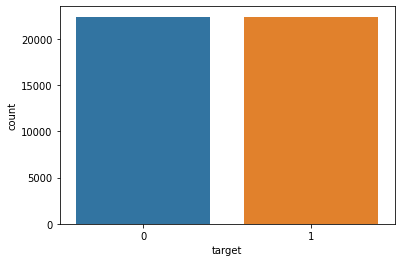

In [ ]:
sns.countplot(smote_y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
lr = LogisticRegression()

In [ ]:
params = {'C': np.linspace(1.00, 3.99, 50)}

## Creating RandomizedSearchCV CV object
grid = RandomizedSearchCV(estimator=lr,
                                param_distributions=params,
                                scoring='f1',
                                n_iter = 100,
                                cv=3)

# Fitting n the estimator provided
model_grid = grid.fit(smote_x, smote_y)

model_grid.best_score_

0.5978954355488679

In [ ]:
model_grid.best_params_

{'C': 2.342448979591837}

In [ ]:
model = LogisticRegression(**model_grid.best_params_)

In [ ]:
model.fit(smote_x, smote_y)

LogisticRegression(C=2.342448979591837)

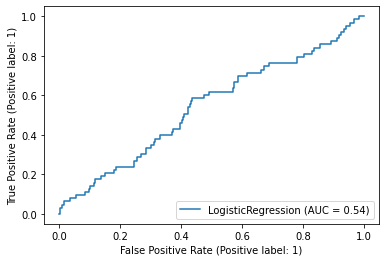

In [ ]:
plot_roc_curve(model,x_test_1, y_test_1)

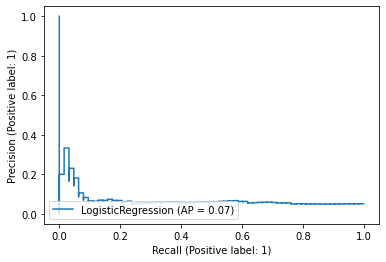

In [ ]:
plot_precision_recall_curve(model,x_test_1, y_test_1)

In [ ]:
pred = model.predict(x_test_1)

In [ ]:
print(classification_report(y_test_1, pred))

              precision    recall  f1-score   support

           0       0.95      0.59      0.73      1180
           1       0.06      0.48      0.10        63

    accuracy                           0.59      1243
   macro avg       0.51      0.53      0.42      1243
weighted avg       0.91      0.59      0.70      1243



In [ ]:
pred_train = model.predict(smote_x)

In [ ]:
print(classification_report(smote_y, pred_train))

              precision    recall  f1-score   support

           0       0.60      0.59      0.59     22408
           1       0.59      0.60      0.60     22408

    accuracy                           0.59     44816
   macro avg       0.59      0.59      0.59     44816
weighted avg       0.59      0.59      0.59     44816



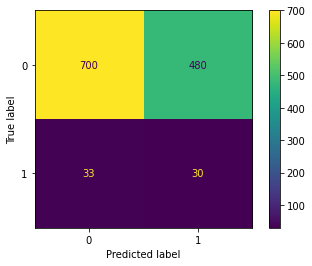

In [ ]:
plot_confusion_matrix(model,x_test_1, y_test_1)

In [ ]:
mod = LogisticRegression(C=1, max_iter=500)

In [ ]:
mod.fit(smote_x, smote_y)

LogisticRegression(C=1, max_iter=500)

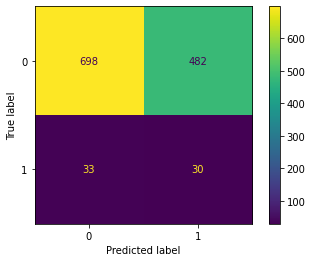

In [ ]:
plot_confusion_matrix(mod,x_test_1, y_test_1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier()

params = {'criterion': ['gini', 'entropy'],
                      'max_depth': np.random.randint(2,10000,50),
                      'min_samples_split': np.random.randint(2,30,20),
                      'min_samples_leaf': np.random.randint(2,30,20)}

## Creating RandomizedSearchCV CV object
grid = RandomizedSearchCV(estimator=DT,
                                param_distributions=params,
                                scoring='f1',
                                n_iter=100,
                                cv=5)

# Fitting n the estimator provided
DT_grid = grid.fit(x_cluster_1, y_cluster_1)
best_train_score = DT_grid.best_score_

In [ ]:
best_train_score

0.057401864097911634

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier()

params = {'n_estimators': np.random.randint(100, 1000, 50),
                      'criterion': ['gini', 'entropy'],
                      'max_depth': np.random.randint(10, 200, 10)}

## Creating RandomizedSearchCV CV object
grid = RandomizedSearchCV(estimator=RF,
                                param_distributions=params,
                                n_iter=30,
                                scoring='f1',
                                cv=3)

# Fitting n the estimator provided
RF_grid = grid.fit(x_cluster_1, y_cluster_1)
best_train_score = RF_grid.best_score_

In [ ]:
best_train_score

0.05309073375715786

In [ ]:
RF_grid.best_params_

{'n_estimators': 937, 'max_depth': 117, 'criterion': 'gini'}

In [ ]:
a = RandomForestClassifier(**RF_grid.best_params_)

a.fit(x_cluster_1, y_cluster_1)

RandomForestClassifier(max_depth=117, n_estimators=937)

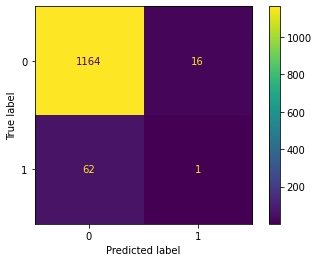

In [ ]:
plot_confusion_matrix(a,x_test_1, y_test_1)

In [ ]:
smote_x.duplicated().sum()

1061

In [ ]:
smote_x.shape

(44816, 34)

## Cluster- 0

In [ ]:
x_cluster_0 = train_0.drop(['cluster',	'target'], axis='columns')
y_cluster_0 = train_0['target']

x_test_0 =  test_0.drop(['cluster',	'target'], axis='columns')
y_test_0 = test_0['target']